#  <center> Speech Emotion Recognition <center>

### I am going to build a speech emotion detection classifier.
### But first we need to learn about what is speech recognition (SER) and why are we building this project? Well, few of the reasons are-

#### First, lets define SER i.e. Speech Emotion Recognition.
* Speech Emotion Recognition, abbreviated as SER, is the act of attempting to recognize human emotion and affective states from speech. This is capitalizing on the fact that voice often reflects underlying emotion through tone and pitch. This is also the phenomenon that animals like dogs and horses employ to be able to understand human emotion.

#### Why we need it?

1. Emotion recognition is the part of speech recognition which is gaining more popularity and need for it increases enormously. Although there are methods to recognize emotion using machine learning techniques, this project attempts to use deep learning to recognize the emotions from data.

2. SER(Speech Emotion Recognition) is used in call center for classifying calls according to emotions and can be used as the performance parameter for conversational analysis thus identifying the unsatisfied customer, customer satisfaction and so on.. for helping companies improving their services

3. It can also be used in-car board system based on information of the mental state of the driver can be provided to the system to initiate his/her safety preventing accidents to happen

#### Datasets used in this project

* Crowd-sourced Emotional Mutimodal Actors Dataset (Crema-D)
* Ryerson Audio-Visual Database of Emotional Speech and Song (Ravdess)
* Surrey Audio-Visual Expressed Emotion (Savee)
* Toronto emotional speech set (Tess)

In [9]:
! pip install librosa
! apt-get update
! apt-get install -y libsndfile-dev 

'apt-get' is not recognized as an internal or external command,
operable program or batch file.
'apt-get' is not recognized as an internal or external command,
operable program or batch file.


# Importing Libraries

In [10]:
import pandas as pd
import numpy as np
import os
import sys

import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

from IPython.display import Audio

import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical  # Corrected Import
from keras.callbacks import ModelCheckpoint

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)


## Data Preparation
* As we are working with four different datasets, so i will be creating a dataframe storing all emotions of the data in dataframe with their paths.
* We will use this dataframe to extract features for our model training.

##  <center> 3. TESS dataset <center>

In [11]:
import os
import pandas as pd

# Define the base directory where TESS dataset is located
TESS_DIR = r"C:\Users\Kavitha\Downloads\New folder (5)\TESS"  # Using raw string

# List all subdirectories inside TESS folder
tess_directory_list = os.listdir(TESS_DIR)

file_emotion = []
file_path = []

for dir in tess_directory_list:
    dir_path = os.path.join(TESS_DIR, dir)  # Full path of the directory
    if os.path.isdir(dir_path):  # Ensure it's a directory
        for file in os.listdir(dir_path):
            if file.endswith('.wav'):  # Only process audio files
                part = file.split('.')[0].split('_')[2]
                emotion = 'surprise' if part == 'ps' else part
                file_emotion.append(emotion)
                file_path.append(os.path.join(dir_path, file))  # Full file path

# Create DataFrame
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)

# Display the first few rows
print(Tess_df.head())


  Emotions                                               Path
0    angry  C:\Users\Kavitha\Downloads\New folder (5)\TESS...
1    angry  C:\Users\Kavitha\Downloads\New folder (5)\TESS...
2    angry  C:\Users\Kavitha\Downloads\New folder (5)\TESS...
3    angry  C:\Users\Kavitha\Downloads\New folder (5)\TESS...
4    angry  C:\Users\Kavitha\Downloads\New folder (5)\TESS...


In [12]:
# creating Dataframe using all the 4 dataframes we created so far.
data_path = pd.concat([ Tess_df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path.head(25)

,Emotions,Path
0,angry,C:\Users\Kavitha\Downloads\New folder (5)\TESS...
1,angry,C:\Users\Kavitha\Downloads\New folder (5)\TESS...
2,angry,C:\Users\Kavitha\Downloads\New folder (5)\TESS...
3,angry,C:\Users\Kavitha\Downloads\New folder (5)\TESS...
4,angry,C:\Users\Kavitha\Downloads\New folder (5)\TESS...
5,angry,C:\Users\Kavitha\Downloads\New folder (5)\TESS...
6,angry,C:\Users\Kavitha\Downloads\New folder (5)\TESS...
7,angry,C:\Users\Kavitha\Downloads\New folder (5)\TESS...
8,angry,C:\Users\Kavitha\Downloads\New folder (5)\TESS...
9,angry,C:\Users\Kavitha\Downloads\New folder (5)\TESS...


## Data Visualisation and Exploration

First let's plot the count of each emotions in our dataset.

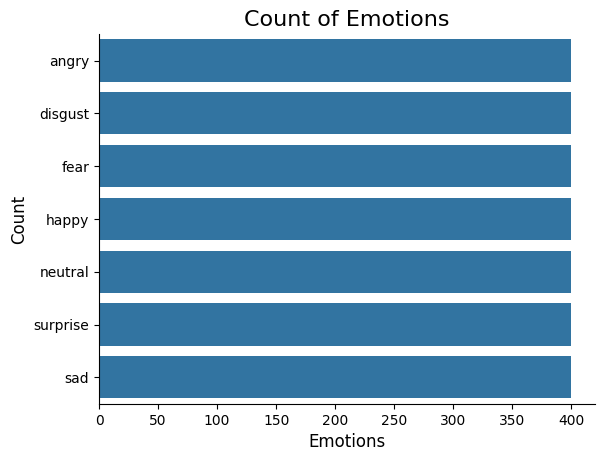

In [13]:
plt.title('Count of Emotions', size=16)
sns.countplot(data_path.Emotions)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

We can also plot waveplots and spectograms for audio signals

* Waveplots - Waveplots let us know the loudness of the audio at a given time.
* Spectograms - A spectrogram is a visual representation of the spectrum of frequencies of sound or other signals as they vary with time. It’s a representation of frequencies changing with respect to time for given audio/music signals.

In [16]:
from IPython.display import Audio


In [19]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

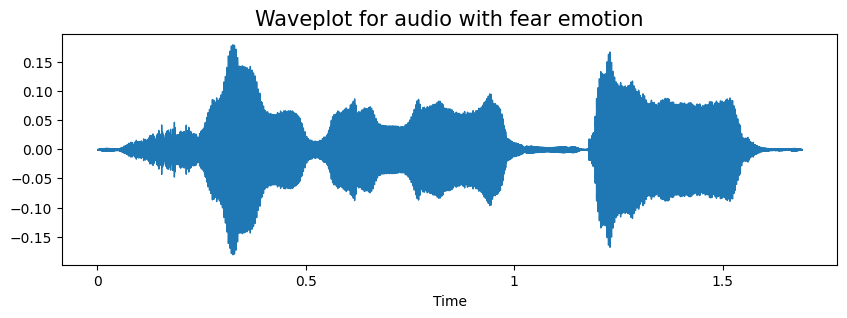

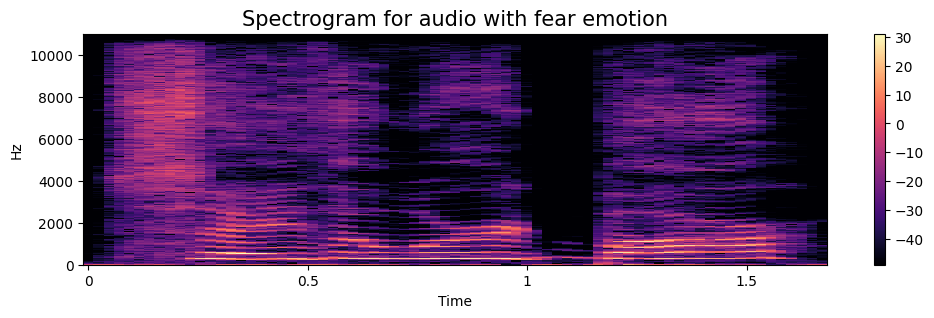

In [20]:
emotion='fear'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

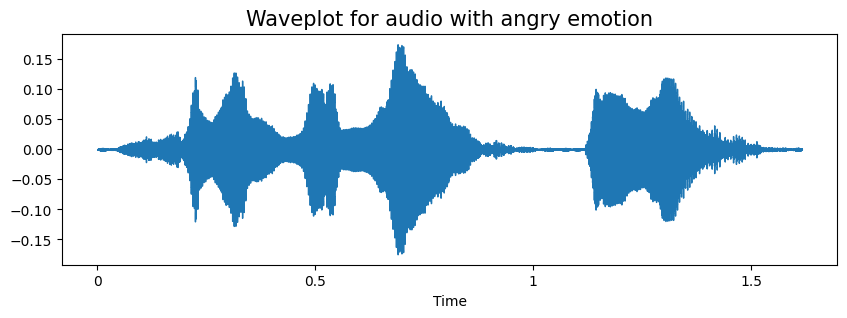

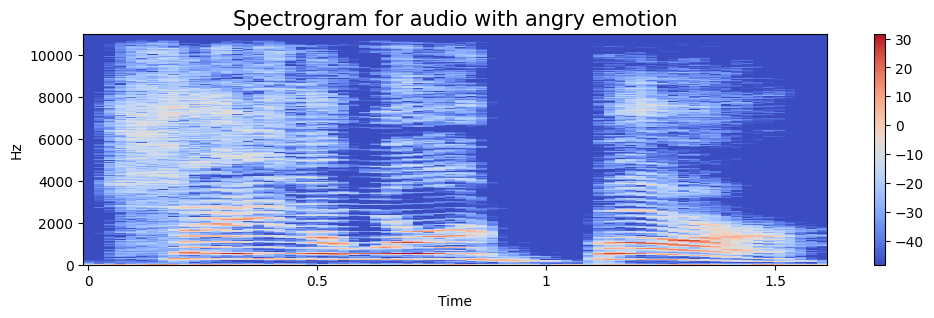

In [21]:
emotion='angry'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

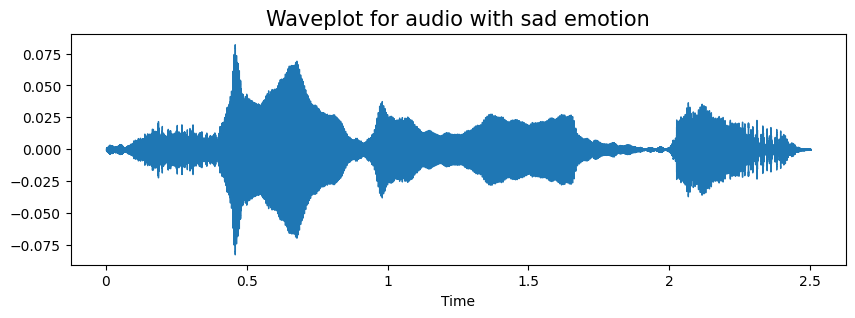

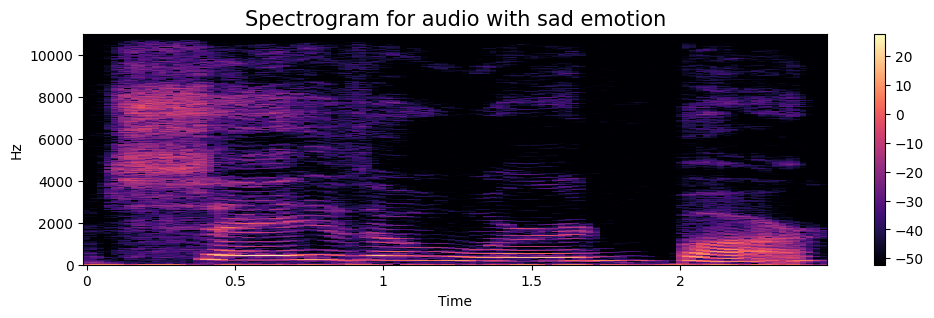

In [22]:
emotion='sad'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

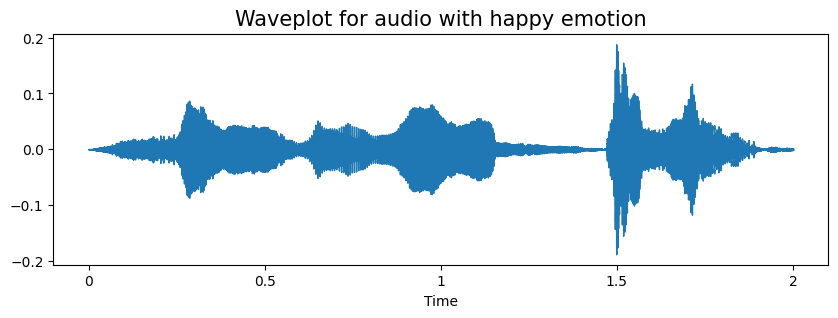

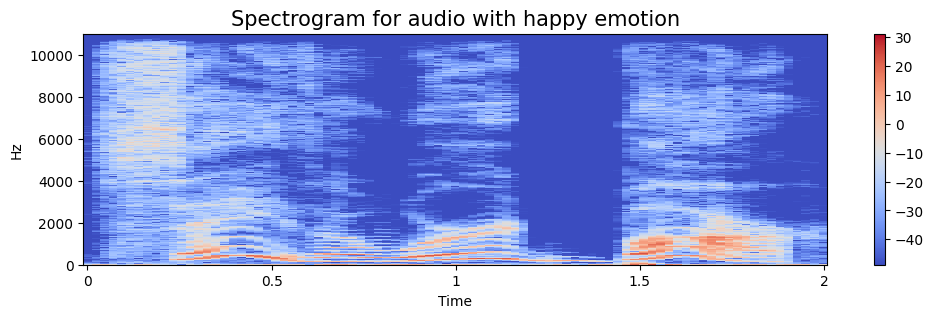

In [23]:
emotion='happy'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

## Data Augmentation

- Data augmentation is the process by which we create new synthetic data samples by adding small perturbations on our initial training set.
- To generate syntactic data for audio, we can apply noise injection, shifting time, changing pitch and speed.
- The objective is to make our model invariant to those perturbations and enhace its ability to generalize.
- In order to this to work adding the perturbations must conserve the same label as the original training sample.
- In images data augmention can be performed by shifting the image, zooming, rotating ...

First, let's check which augmentation techniques works better for our dataset.

In [24]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

# taking any example and checking for techniques.
path = np.array(data_path.Path)[1]
data, sample_rate = librosa.load(path)

#### 1. Simple Audio

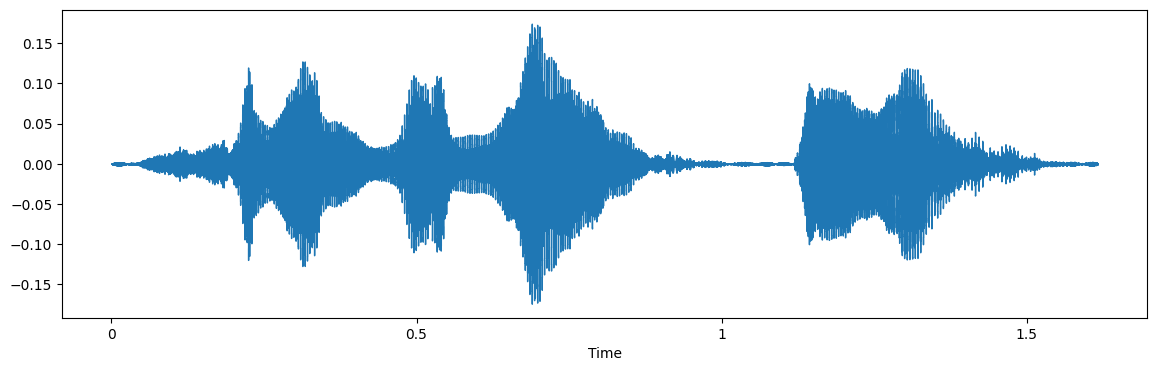

In [26]:
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=data, sr=sample_rate)
Audio(path)

#### 2. Noise Injection

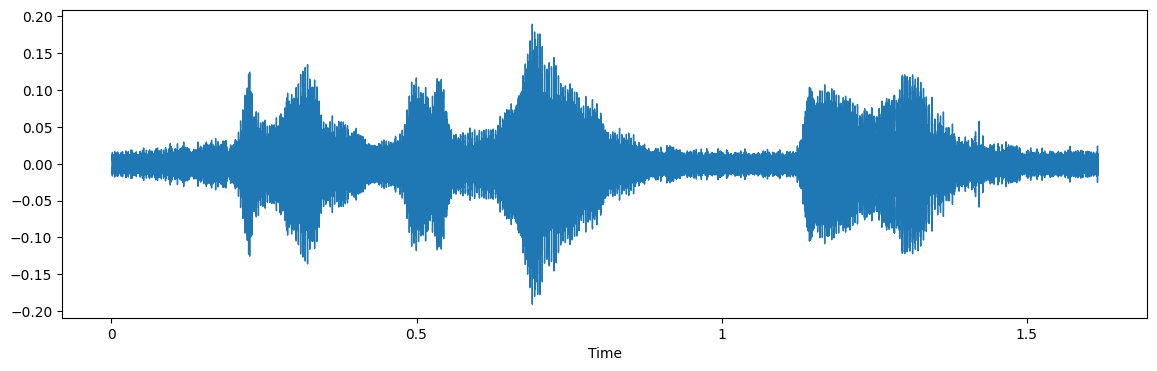

In [27]:
x = noise(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

We can see noise injection is a very good augmentation technique because of which we can assure our training model is not overfitted

#### 3. Stretching

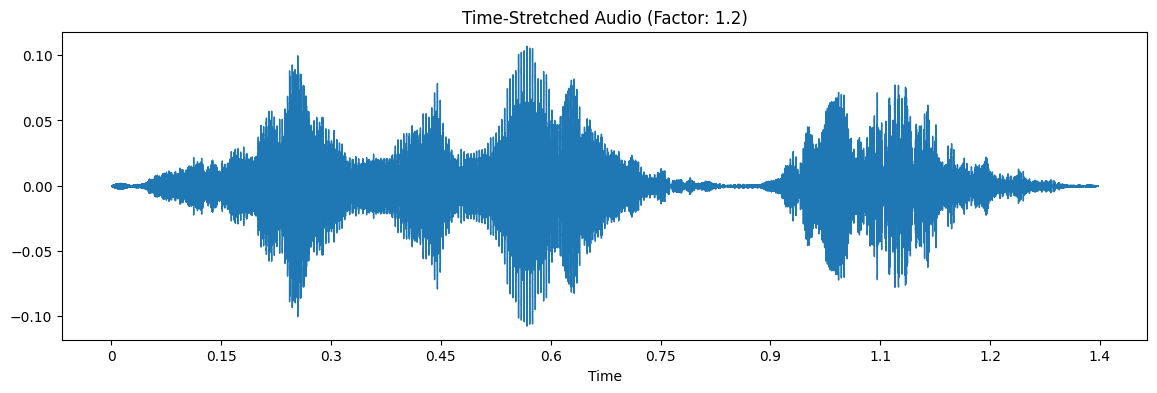

In [29]:
# Load audio
data, sample_rate = librosa.load(path)

# Apply time stretching (stretch factor > 1 speeds up, < 1 slows down)
stretch_factor = 1.2  # Adjust as needed
x = librosa.effects.time_stretch(data, rate=stretch_factor)  # ✅ Correct usage

# Plot the stretched waveform
plt.figure(figsize=(14, 4))
librosa.display.waveshow(y=x, sr=sample_rate)  # ✅ Use `waveshow()`
plt.title(f"Time-Stretched Audio (Factor: {stretch_factor})")
plt.show()

# Play audio
Audio(x, rate=sample_rate)

#### 4. Shifting

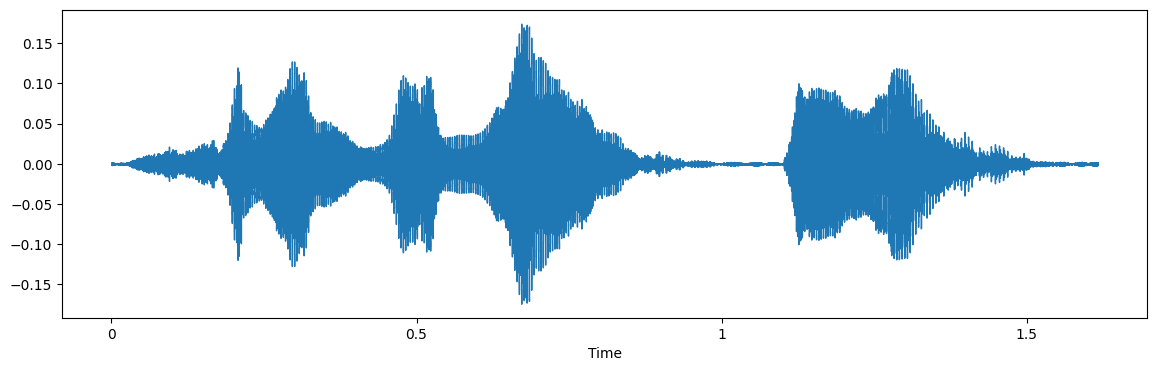

In [31]:
x = shift(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

#### 5. Pitch

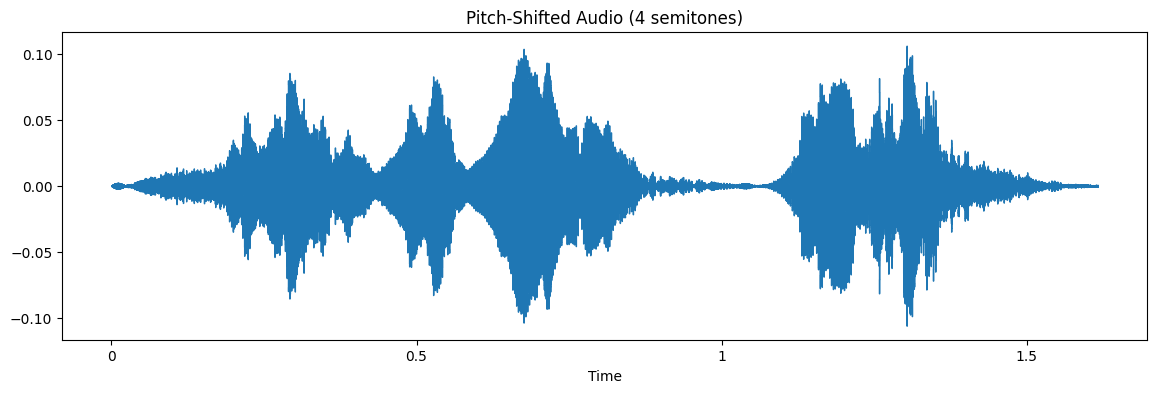

In [33]:
# Load the audio file
data, sample_rate = librosa.load(path)

# Apply pitch shifting (number of semitones)
n_steps = 4  # Positive values increase pitch, negative values decrease it
x = librosa.effects.pitch_shift(data, sr=sample_rate, n_steps=n_steps)  # ✅ Correct usage

# Plot the pitch-shifted waveform
plt.figure(figsize=(14, 4))
librosa.display.waveshow(y=x, sr=sample_rate)  # ✅ Use `waveshow()`
plt.title(f"Pitch-Shifted Audio ({n_steps} semitones)")
plt.show()

# Play the modified audio
Audio(x, rate=sample_rate)

- From the above types of augmentation techniques i am using noise, stretching(ie. changing speed) and some pitching.

## Feature Extraction
- Extraction of features is a very important part in analyzing and finding relations between different things. As we already know that the data provided of audio cannot be understood by the models directly so we need to convert them into an understandable format for which feature extraction is used.


The audio signal is a three-dimensional signal in which three axes represent time, amplitude and frequency.

![image.png](https://miro.medium.com/max/633/1*7sKM9aECRmuoqTadCYVw9A.jpeg)

I am no expert on audio signals and feature extraction on audio files so i need to search and found a very good blog written by [Askash Mallik](https://medium.com/heuristics/audio-signal-feature-extraction-and-clustering-935319d2225) on feature extraction.

As stated there with the help of the sample rate and the sample data, one can perform several transformations on it to extract valuable features out of it.
1. Zero Crossing Rate : The rate of sign-changes of the signal during the duration of a particular frame.
2. Energy : The sum of squares of the signal values, normalized by the respective frame length.
3. Entropy of Energy : The entropy of sub-frames’ normalized energies. It can be interpreted as a measure of abrupt changes.
4. Spectral Centroid : The center of gravity of the spectrum.
5. Spectral Spread : The second central moment of the spectrum.
6. Spectral Entropy :  Entropy of the normalized spectral energies for a set of sub-frames.
7. Spectral Flux : The squared difference between the normalized magnitudes of the spectra of the two successive frames.
8. Spectral Rolloff : The frequency below which 90% of the magnitude distribution of the spectrum is concentrated.
9.  MFCCs Mel Frequency Cepstral Coefficients form a cepstral representation where the frequency bands are not linear but distributed according to the mel-scale.
10. Chroma Vector : A 12-element representation of the spectral energy where the bins represent the 12 equal-tempered pitch classes of western-type music (semitone spacing).
11. Chroma Deviation : The standard deviation of the 12 chroma coefficients.


In this project i am not going deep in feature selection process to check which features are good for our dataset rather i am only extracting 5 features:
- Zero Crossing Rate
- Chroma_stft
- MFCC
- RMS(root mean square) value
- MelSpectogram to train our model.

In [41]:
import librosa
import numpy as np

# Fix the stretch function
def stretch(data, rate=1.2):
    """Apply time stretching to an audio signal."""
    return librosa.effects.time_stretch(y=data, rate=rate)

# Fix the pitch function
def pitch(data, sr, n_steps=2):  # Default pitch shift by 2 semitones
    return librosa.effects.pitch_shift(data, sr=sr, n_steps=n_steps)

def get_features(path):
    """Extract features with and without augmentation."""
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)

    # Extract features from original data
    res1 = extract_features(data)
    result = np.array(res1)

    # Add Gaussian noise
    noise_data = data + 0.005 * np.random.normal(0, 1, data.shape)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2))

    # Time-stretch and pitch shift
    new_data = stretch(data, rate=1.2)  # ✅ Fixed time_stretch() usage
    data_stretch_pitch = librosa.effects.pitch_shift(new_data, sr=sample_rate, n_steps=2)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3))

    return result




In [42]:
X, Y = [], []
for path, emotion in zip(data_path.Path, data_path.Emotions):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)

In [43]:
len(X), len(Y), data_path.Path.shape

(8400, 8400, (2800,))

In [44]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
Features.head()

,0,1,2,3,4,5,6,7,8,9,...,153,154,155,156,157,158,159,160,161,labels
0,0.054342,0.538993,0.596808,0.396304,0.364695,0.441099,0.413557,0.373404,0.568096,0.573010,...,0.000105,0.000157,0.000185,0.000133,0.000134,0.000070,0.000038,0.000034,6.250596e-06,angry
1,0.221048,0.735735,0.563363,0.532358,0.609153,0.604475,0.449916,0.594032,0.667867,0.523044,...,0.001701,0.001758,0.002030,0.001917,0.001817,0.001805,0.001731,0.001677,1.688819e-03,angry
2,0.079403,0.521932,0.572047,0.671290,0.444520,0.303234,0.386814,0.422445,0.280799,0.465868,...,0.000094,0.000038,0.000024,0.000018,0.000016,0.000039,0.000044,0.000015,1.187150e-06,angry
3,0.058006,0.635519,0.406851,0.370775,0.404711,0.507197,0.455434,0.395454,0.421722,0.353537,...,0.000115,0.000082,0.000030,0.000011,0.000015,0.000021,0.000019,0.000015,9.260864e-07,angry
4,0.234353,0.804592,0.663797,0.565429,0.560514,0.616160,0.530957,0.443426,0.488626,0.488627,...,0.001908,0.001926,0.001789,0.001670,0.001634,0.001707,0.001859,0.001804,1.871096e-03,angry


* We have applied data augmentation and extracted the features for each audio files and saved them.

## Data Preparation

- As of now we have extracted the data, now we need to normalize and split our data for training and testing.

In [45]:
X = Features.iloc[: ,:-1].values
Y = Features['labels'].values

In [46]:
# As this is a multiclass classification problem onehotencoding our Y.
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [47]:
# splitting data
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((6300, 162), (6300, 7), (2100, 162), (2100, 7))

In [48]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((6300, 162), (6300, 7), (2100, 162), (2100, 7))

In [49]:
# making our data compatible to model.
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((6300, 162, 1), (6300, 7), (2100, 162, 1), (2100, 7))

In [50]:
x_train.shape

(6300, 162, 1)

## Modelling

In [51]:
model=Sequential()

# model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
# model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

# model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
# model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

# model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
# model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
# model.add(Dropout(0.2))

# model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
# model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(keras.layers.LSTM(128, input_shape=(x_train.shape[1], x_train.shape[2]), return_sequences=True))
model.add(keras.layers.LSTM(128))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=7, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 162, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 208,711 (815.28 KB)

 Trainable params: 208,711 (815.28 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)
history=model.fit(x_train, y_train, batch_size=64, epochs=70, validation_data=(x_test, y_test), callbacks=[rlrp])

Epoch 1/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 14s 138ms/step - accuracy: 0.2677 - loss: 1.7236 - val_accuracy: 0.3248 - val_loss: 1.6578 - learning_rate: 0.0010
Epoch 2/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 16s 161ms/step - accuracy: 0.3039 - loss: 1.6898 - val_accuracy: 0.3810 - val_loss: 1.5947 - learning_rate: 0.0010
Epoch 3/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 17s 176ms/step - accuracy: 0.3520 - loss: 1.5978 - val_accuracy: 0.4081 - val_loss: 1.4626 - learning_rate: 0.0010
Epoch 4/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 13s 135ms/step - accuracy: 0.3981 - loss: 1.5085 - val_accuracy: 0.4514 - val_loss: 1.3846 - learning_rate: 0.0010
Epoch 5/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 14s 141ms/step - accuracy: 0.4115 - loss: 1.5180 - val_accuracy: 0.3114 - val_loss: 1.7101 - learning_rate: 0.0010
Epoch 6/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 14s 143ms/step - accuracy: 0.3434 - loss: 1.6710 - val_accuracy: 0.4443 - val_loss: 1.4441 - learning_rate: 0.0010
Epoch 7/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 14s 140ms/step - accuracy: 0.4566 - loss: 1.

66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.6739 - loss: 0.8478
Accuracy of our model on test data :  67.61904954910278 %


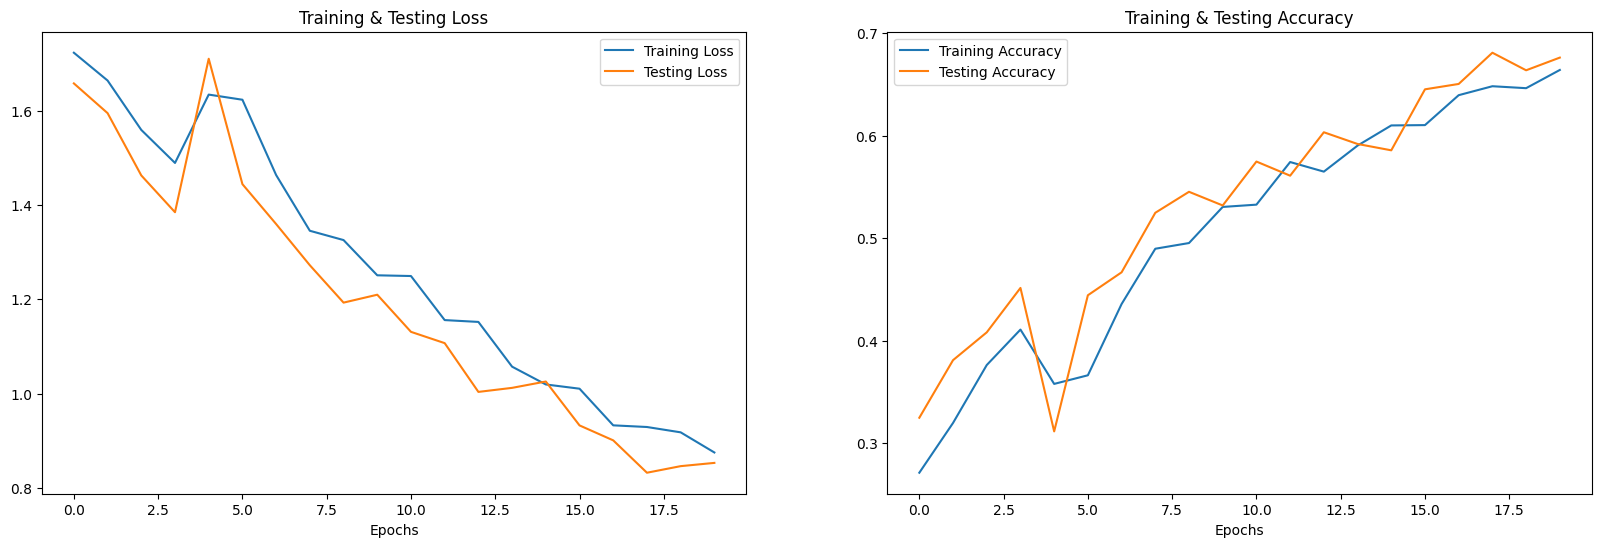

In [54]:
print("Accuracy of our model on test data : " , model.evaluate(x_test,y_test)[1]*100 , "%")

epochs = [i for i in range(20)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [55]:
# predicting on test data.
pred_test = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)

66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step


In [56]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(10)

,Predicted Labels,Actual Labels
0,neutral,neutral
1,disgust,surprise
2,neutral,neutral
3,disgust,happy
4,surprise,surprise
5,fear,fear
6,fear,fear
7,neutral,sad
8,disgust,disgust
9,fear,fear


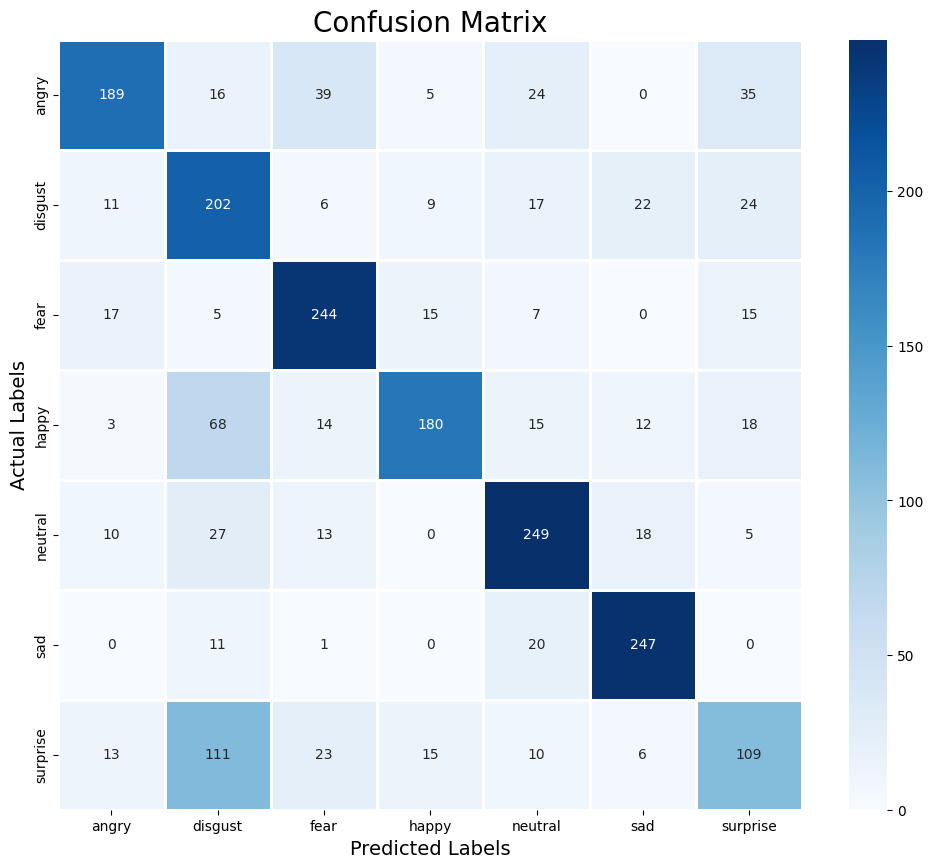

In [57]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [58]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       0.78      0.61      0.69       308
     disgust       0.46      0.69      0.55       291
        fear       0.72      0.81      0.76       303
       happy       0.80      0.58      0.67       310
     neutral       0.73      0.77      0.75       322
         sad       0.81      0.89      0.85       279
    surprise       0.53      0.38      0.44       287

    accuracy                           0.68      2100
   macro avg       0.69      0.68      0.67      2100
weighted avg       0.69      0.68      0.67      2100



- We can see our model is more accurate in predicting surprise, angry emotions and it makes sense also because audio files of these emotions differ to other audio files in a lot of ways like pitch, speed etc..
- We overall achieved 61% accuracy on our test data and its decent but we can improve it more by applying more augmentation techniques and using other feature extraction methods.

In [59]:
model.save("sound_model.h5")